In [39]:
using Random
include("src/plotting_utils.jl")

print_S_info (generic function with 1 method)

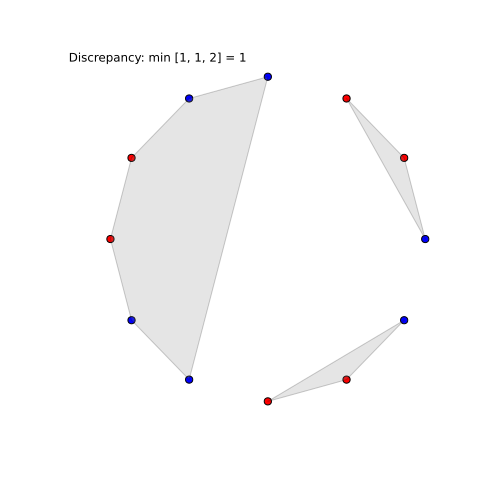

In [45]:
n = 12
S = zeros(12,2)
θ = 2π / n
for i = 1:n
    S[i,:] = [sin(θ*i), cos(θ*i)]
end
w = [1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1]
Π = [1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3]
plot_rb_points(S,w,Π,true)

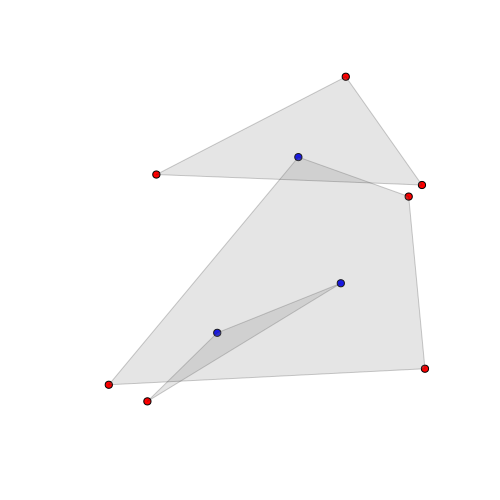

In [50]:
# hasta aqui no hay chequeo de "convex partition" solo ploter y calculo discrepancia

n = 10
S = rand(n,2)
w = rand([-1,1], n)
k = 3

# asignar ptos a partes aleatoreamente
# el collect es para tener al menos un pto por parte

Π = shuffle!(cat(collect(1:k), rand(1:k, n-k), dims=1)) 

plot_rb_points(S,w,Π)